Case 1. Undamped model.

The undamped MK system equation of motion is given by:

$m\ddot{x}+kx=0$

Assume a solution for simple harmonic motion displacement and its derivatives using complex exponential notation in the form:

$x(t)=Ce^{i\omega_n t}$

$\dot{x}(t)=i\omega_n Ce^{i\omega_n t}$

$\ddot{x}(t)=-\omega_n^2 Ce^{i\omega_n t}$

Then, subsituting the assumed solutions into the equation of motion gives:

$C(k-m\omega_n^2)=0$

Which is called the characteristic, or frequency equation, and it holds when:

$\omega_n=\sqrt{\frac{k}{m}}$

This is the natural frequency of the system, the system oscillates in simple harmonic motion at this frequency only when in free vibration. The equation of motion can then be expressed as:

The general solution is given by:

$x(t)=Asin(\omega_n t)+Bcos(\omega_n t)$

Most general solution, $A,$ $B$ constants depend upon Initial Conditions (IC) of the system, i.e. displacement $x_0$ and velocity $\dot{x_0}$ at $t=0$. Evaluating the response and its derivative at $t=0$ gives the particular solution:

$x(t)=\frac{\dot{x_0}}{\omega_n}sin(\omega_n t)+x_0cos(\omega_n t)$

$\dot{x}(t)=\dot{x_0}cos(\omega_n t)-\omega_n x_0sin(\omega_n t)$

Which can also be expressed as:

$x(t)= Csin(\omega_n t + \phi)$

Considering that C gives the peak amplitude response and $\phi$ is the phase angle:

$C=\sqrt{A^2+B^2}$

$\phi=tan^{-1}\frac{B}{A}$

Results in:

$C=\sqrt{\left(\frac{\dot{x_0}}{\omega_n}\right)^2+x_0^2}=\frac{\sqrt{x_0^2\omega_n^2+\dot{x_o^2}}}{\omega_n}$

$\phi=tan^{-1}\frac{\omega_nx_0}{\dot{x_0}}$

Lets evaluate the response


In [1]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

%matplotlib inline

# Import the plotting module 
import matplotlib.pyplot as plt

# Define system Parameters
m = 1.0                   # kg
k = 1.0                   # N/m 
wn = np.sqrt(k/m)         # Natural Frequency (rad/s)

In [2]:
# Set up simulation parameters
t = np.linspace(0, 20, 501)          

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([1.0, 1.0])

In [3]:
# Calculate displacement x(t) 
x = x0[1]/wn*np.sin(wn*t)+x0[0]*np.cos(wn*t)

# Calculate velocity response

v = x0[1]*np.cos(wn*t)-wn*x0[0]*np.sin(wn*t)



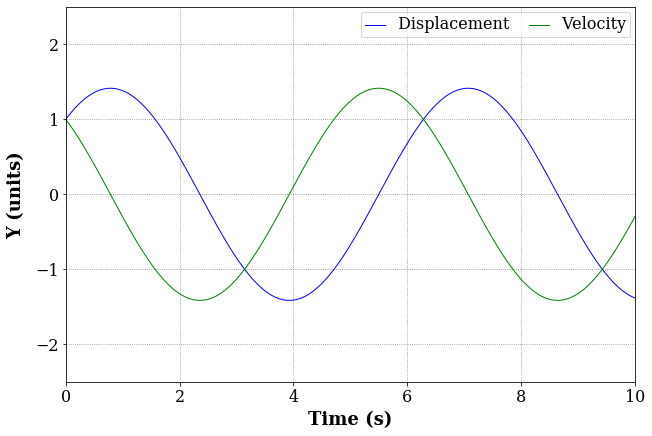

In [4]:
# Plot the results

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Time (s)',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Y (units)',family='serif',fontsize=18,weight='bold',labelpad=10)

# Plot with different line styles and add labels

plt.plot(t, x, color="blue", linewidth=1.0, linestyle='-', label=r' Displacement')
plt.plot(t, v, color="green", linewidth=1.0, linestyle='-', label=r' Velocity')


# Set axis limits
plt.xlim(0,10)
plt.ylim(-2.5,2.5)

# Add the legend calling the command, specify position and columns
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout to fill the page using the new tight_layout command
plt.tight_layout(pad=0.5)


Note the phase difference of 90 degrees, i.e. $\pi/2$ between displacement and velocity

The single degree of freedom system with viscous damping is represented by the equation of motion:

$\quad m \ddot{x} + c \dot{x} + kx = 0$

Also expressed as

$\quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

Where $\omega_n$ is te natural frequency and $\zeta$ the viscous dampin gratio:

$\omega_n=\sqrt{\frac{k}{m}}$

$\zeta=\frac{c}{c_c}=\frac{c}{2\sqrt{mk}}=\frac{c}{2m\omega_n}$

The solution of this equation when the system is uderdamped, i.e. $\zeta<1$ is:

$\quad x(t) = e^{-\zeta\omega_nt}\left(C_1 e^{i \omega_d t} + C_2 e ^{-i \omega_d t}\right)$

Also expresed in terms of sine and cosine functions

$\quad x(t) = e^{-\zeta\omega_nt}\left(A \cos{\omega_d t} + B \sin{\omega_d t}\right)$

Considering the initial conditions, the equation can be written as:

$\quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right)$

And also expressed as:

$x(t)= Ce^{-\zeta\omega_nt}sin(\omega_d t + \phi)$

Where

$C=\sqrt\frac{(\dot{x_0}+\zeta\omega_nx_0)^2+(x_0\omega_d)^2}{\omega_d^2}$

and 

$\phi=tan^{-1}\frac{x_0\omega_d}{\dot{x_0}+\zeta\omega_nx_0}$




In [5]:
# Change integration time and initial conditions if needed

# Set up simulation parameters
t = np.linspace(0, 50, 501)         

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([1.0, 1.0])

In [12]:
z = 0.05                  # Viscous damping ratio
c = 2*z*wn*m              # Damping constant (N/(m/s))
wd = wn*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

In [10]:
# Calculate system response x(t)
x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))

# Response can also be expressed using the amplitude C and phase angle

# Calculate amplitude and exponential decay
amp = np.sqrt(x0[0]**2 + ((z*wn*x0[0] + x0[1])/wd)**2)
phase = np.arctan((x0[0]*wd)/(x0[1]+z*wn*x0[0])) 
decay_env = amp * np.exp(-z*wn*t)

x = decay_env * np.sin(wd*t+phase)

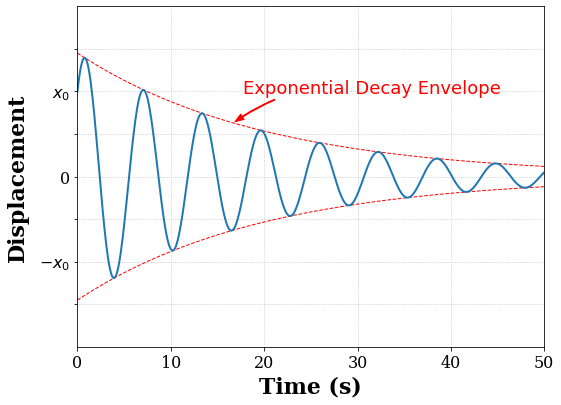

In [13]:
# Set format for figure and plot the results

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Displacement', family='serif', fontsize=22, weight='bold', labelpad=10)

# plot the decay envelope
plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "red")
plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "red")

plt.plot(t, x, linewidth=2, linestyle = '-', label=r'Response')

# Set axis limits
plt.xlim(0,50)
plt.ylim(-2,2)

plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

plt.annotate('Exponential Decay Envelope',
         xy=(t[int(len(t)/3)],decay_env[int(len(t)/3)]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=18,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3, rad=.2", color="red"), color = "red")


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

The exponential decay can be used to estimate the damping.